### Load Dataset of 20 super classes classes from cifar 100

trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1)
trainX.dtype: uint8, trainY.dtype: int64, testX.dtype: uint8, testY.dtype: int64
trainX.Range: 255 - 0, testX.Range: 255 - 0


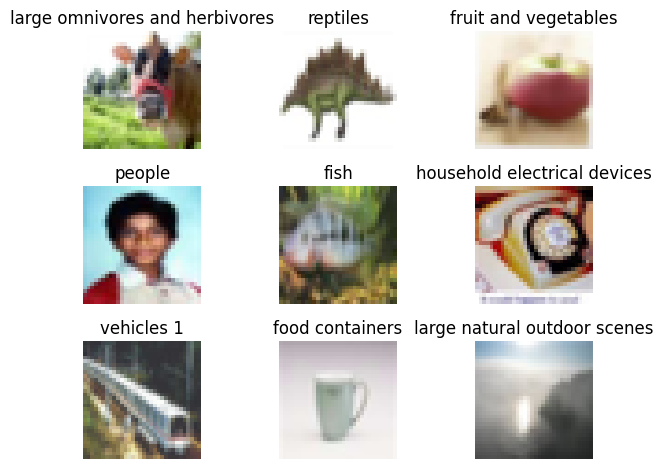

In [1]:
from keras.datasets import cifar100
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

def display_img(img_set, title_set):
    n = len(title_set)
    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_set[i])
        plt.title(title_set[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load CIFAR-100 with coarse labels (20 classes)
(trainX, trainY), (testX, testY) = cifar100.load_data(label_mode='coarse')

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Optional: Map class indices to class names
coarse_label_names = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles',
    'small mammals', 'trees', 'vehicles 1', 'vehicles 2'
]

# Display first 9 images with their class names
display_img(trainX[:9], [coarse_label_names[label[0]] for label in trainY[:9]])


### Pre Process the data

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

# Normalize the pixel values to [0, 1]
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

# Resize images to 96x96 (required by most ImageNet pre-trained models)
trainX = tf.image.resize(trainX, (96, 96))
testX = tf.image.resize(testX, (96, 96))

# Convert labels to one-hot encoding (20 classes)
trainY = to_categorical(trainY, num_classes=20)
testY = to_categorical(testY, num_classes=20)

# Print data shapes and types
print(f"trainX.shape: {trainX.shape}, testX.shape: {testX.shape}")
print(f"trainX.dtype: {trainX.dtype}, testX.dtype: {testX.dtype}")
print(f"trainY.shape: {trainY.shape}, testY.shape: {testY.shape}")
print(f"trainY.dtype: {trainY.dtype}, testY.dtype: {testY.dtype}")

# Check sample labels
print("Sample trainY (one-hot encoded):")
print(trainY[:5])


trainX.shape: (50000, 96, 96, 3), testX.shape: (10000, 96, 96, 3)
trainX.dtype: <dtype: 'float32'>, testX.dtype: <dtype: 'float32'>
trainY.shape: (50000, 20), testY.shape: (10000, 20)
trainY.dtype: float64, testY.dtype: float64
Sample trainY (one-hot encoded):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## To load exactly the 20 fine labeled class from the cifar 100

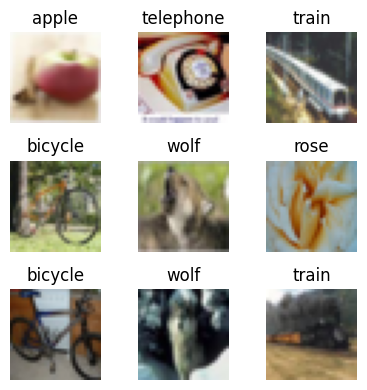

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-100 with fine labels
(trainX_all, trainY_all), (testX_all, testY_all) = cifar100.load_data(label_mode='fine')

# Define 20 selected class names
selected_classes = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',
    'bear', 'tiger', 'lion', 'wolf', 'fox',
    'apple', 'orange', 'pear', 'rose', 'tulip',
    'bicycle', 'motorcycle', 'train', 'rocket', 'telephone'
]

# Full CIFAR-100 fine label names (in order)
all_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# Get indices for selected classes
selected_indices = [all_fine_labels.index(cls) for cls in selected_classes]

# Filter function
def filter_data(X, Y, class_indices):
    mask = np.isin(Y.flatten(), class_indices)
    X_filtered = X[mask]
    Y_filtered = Y[mask]
    label_map = {orig: new for new, orig in enumerate(class_indices)}
    Y_remapped = np.array([label_map[y[0]] for y in Y_filtered]).reshape(-1, 1)
    return X_filtered, Y_remapped

# Apply filtering to training and test sets
trainX_filtered, trainY_filtered = filter_data(trainX_all, trainY_all, selected_indices)
testX_filtered, testY_filtered = filter_data(testX_all, testY_all, selected_indices)

#  Display function
def display_img(img_set, label_set, class_names, n=9):
    plt.figure(figsize=(4, 4))
    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_set[i])
        plt.title(class_names[label_set[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show first 9 filtered images
display_img(trainX_filtered, trainY_filtered, selected_classes)


## Preprocess the data

In [4]:
from tensorflow.image import resize

# Normalize to [0, 1]
trainX_filtered = trainX_filtered.astype('float32') / 255.0
testX_filtered = testX_filtered.astype('float32') / 255.0

# Resize to 96x96x3
trainX_filtered = resize(trainX_filtered, (96, 96))
testX_filtered = resize(testX_filtered, (96, 96))

# One-hot encode labels (20 classes)
trainY_filtered = to_categorical(trainY_filtered, num_classes=20)
testY_filtered = to_categorical(testY_filtered, num_classes=20)

# Final training data
trainX = trainX_filtered
trainY = trainY_filtered
testX = testX_filtered
testY = testY_filtered

# Print data shapes and types
print(f"trainX.shape: {trainX.shape}, testX.shape: {testX.shape}")
print(f"trainX.dtype: {trainX.dtype}, testX.dtype: {testX.dtype}")
print(f"trainY.shape: {trainY.shape}, testY.shape: {testY.shape}")
print(f"trainY.dtype: {trainY.dtype}, testY.dtype: {testY.dtype}")

# Check sample labels
print("Sample trainY (one-hot encoded):")
print(trainY[:5])


trainX.shape: (10000, 96, 96, 3), testX.shape: (2000, 96, 96, 3)
trainX.dtype: <dtype: 'float32'>, testX.dtype: <dtype: 'float32'>
trainY.shape: (10000, 20), testY.shape: (2000, 20)
trainY.dtype: float64, testY.dtype: float64
Sample trainY (one-hot encoded):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 1. MobileNet

In [9]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
import time
# Load pre-trained MobileNet with input shape 96x96x3
mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze all layers in the MobileNet backbone
for layer in mobilenet.layers:
    layer.trainable = False

# Build classification head for 20 classes
inputs_mobilenet = mobilenet.input
x = mobilenet.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs_final = Dense(20, activation='softmax', name='OutputLayer')(x)

# Create the model
model = Model(inputs=inputs_mobilenet, outputs=outputs_final, name='MobileNet_CIFAR100_20Classes')

# Print model summary
model.summary()


C:\Users\User\AppData\Local\Temp\ipykernel_22592\3520486571.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')


Model: "MobileNet_CIFAR100_20Classes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 48, 48, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 48, 48, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 48, 48, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 48, 48, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 48, 48, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 48, 48, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 24, 24, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 24, 24, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 24, 24, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 24, 24, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 24, 24, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 24, 24, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 24, 24, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,819,668 (18.39 MB)

 Trainable params: 1,587,732 (6.06 MB)

 Non-trainable params: 3,231,936 (12.33 MB)

### Transfer Learning

In [10]:
import tensorflow as tf

# Compile the model for Transfer Learning
# (only the new classification head will be trained since MobileNet layers are frozen)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train only the classification head
history_transfer_learning = model.fit(
    trainX, trainY,
    batch_size=64,
    validation_split=0.1,
    epochs=10,
    verbose=1
)

# Evaluate on the test set
start_time = time.time()
t_loss, t_acc = model.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 Transfer Learning Test Accuracy: {t_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.4456 - loss: 2.0648 - val_accuracy: 0.7080 - val_loss: 0.8983
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6880 - loss: 0.9493 - val_accuracy: 0.7140 - val_loss: 0.8861
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.7500 - loss: 0.7498 - val_accuracy: 0.7300 - val_loss: 0.8384
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7695 - loss: 0.6476 - val_accuracy: 0.7140 - val_loss: 0.8295
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8128 - loss: 0.5392 - val_accuracy: 0.7190 - val_loss: 0.8739
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8459 - loss: 0.4527 - val_accuracy: 0.7250 - val_loss: 0.8377
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8586 - loss: 0.4061 - val_accuracy: 0.7270 - val_loss: 0.8726
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8800 - loss: 0.3387 - val_acc

### 2. VGG 16 Model

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
import time
# Load pre-trained VGG16 model, excluding the top classification layers
vgg_base = VGG16(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze all layers in VGG16
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(20, activation='softmax', name='OutputLayer')(x)

# Final model
model_vgg16 = Model(inputs=vgg_base.input, outputs=outputs, name='VGG16_CIFAR100_20Classes')
model_vgg16.summary()


Model: "VGG16_CIFAR100_20Classes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 15,781,204 (60.20 MB)

 Trainable params: 1,063,444 (4.06 MB)

 Non-trainable params: 14,717,760 (56.14 MB)

In [8]:
# Compile the model for transfer learning
model_vgg16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train only the new head
history_vgg_transfer = model_vgg16.fit(
    trainX, trainY,
    batch_size=64,
    validation_split=0.1,
    epochs=10,
    verbose=1
)

# Evaluate
start_time = time.time()
vgg_transfer_loss, vgg_transfer_acc = model_vgg16.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 VGG16 Transfer Learning Test Accuracy: {vgg_transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 244ms/step - accuracy: 0.3093 - loss: 2.6926 - val_accuracy: 0.4190 - val_loss: 2.0054
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.4802 - loss: 1.6809 - val_accuracy: 0.5240 - val_loss: 1.5485
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.5357 - loss: 1.4462 - val_accuracy: 0.5520 - val_loss: 1.4013
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 240ms/step - accuracy: 0.5508 - loss: 1.3640 - val_accuracy: 0.5510 - val_loss: 1.3748
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.5723 - loss: 1.2829 - val_accuracy: 0.5730 - val_loss: 1.3256
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.6094 - loss: 1.1853 - val_accuracy: 0.5830 - val_loss: 1.3102
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.6053 - loss: 1.1687 - val_accuracy: 0.5930 - val_loss: 1.2731
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.6290 - loss: 1

### 3. ResNet50

In [29]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load pre-trained ResNet50 without top layers
resnet_base = ResNet101(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze base model
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom head
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(20, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base.input, outputs=outputs, name='ResNet50_CIFAR100_20')
model_resnet.summary()


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step


Model: "ResNet50_CIFAR100_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 102, 102, 3)       │               0 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 48, 48, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 48, 48, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 48, 48, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 50, 50, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 24, 24, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 24, 24, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 24, 24, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 24, 24, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 24, 24, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 24, 24, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 24, 24, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 24, 24, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 24, 24, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 45,297,556 (172.80 MB)

 Trainable params: 2,636,308 (10.06 MB)

 Non-trainable params: 42,661,248 (162.74 MB)

In [30]:
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet_transfer = model_resnet.fit(trainX, trainY, batch_size=64,
                                           validation_split=0.1, epochs=10, verbose=1)

start_time = time.time()
resnet_transfer_loss, resnet_transfer_acc = model_resnet.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 ResNet50 Transfer Learning Accuracy: {resnet_transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 45s 287ms/step - accuracy: 0.1193 - loss: 3.7313 - val_accuracy: 0.0580 - val_loss: 2.9809
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - accuracy: 0.1767 - loss: 3.0333 - val_accuracy: 0.1120 - val_loss: 2.8448
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 279ms/step - accuracy: 0.2077 - loss: 2.8162 - val_accuracy: 0.1480 - val_loss: 2.8065
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 279ms/step - accuracy: 0.2308 - loss: 2.6584 - val_accuracy: 0.1470 - val_loss: 2.8466
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 279ms/step - accuracy: 0.2524 - loss: 2.5255 - val_accuracy: 0.1420 - val_loss: 3.2112
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 278ms/step - accuracy: 0.2561 - loss: 2.4581 - val_accuracy: 0.1260 - val_loss: 4.1364
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 280ms/step - accuracy: 0.2813 - loss: 2.3603 - val_accuracy: 0.1220 - val_loss: 4.4018
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 280ms/step - accuracy: 0.2845 - loss: 2

### 4. InceptionV3

In [11]:
from tensorflow.keras.applications import InceptionV3

inception_base = InceptionV3(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

for layer in inception_base.layers:
    layer.trainable = False

x = inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(20, activation='softmax')(x)

model_inception = Model(inputs=inception_base.input, outputs=outputs, name='InceptionV3_CIFAR100_20')
model_inception.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


Model: "InceptionV3_CIFAR100_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 47, 47, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_6         │ (None, 47, 47, 32)        │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 47, 47, 32)        │               0 │ batch_normalization_6[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 45, 45, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_7         │ (None, 45, 45, 32)        │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 45, 45, 32)        │               0 │ batch_normalization_7[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 45, 45, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_8         │ (None, 45, 45, 64)        │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 45, 45, 64)        │               0 │ batch_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 22, 22, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 22, 22, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_9         │ (None, 22, 22, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 22, 22, 80)        │               0 │ batch_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 20, 20, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,442,164 (93.24 MB)

 Trainable params: 2,636,308 (10.06 MB)

 Non-trainable params: 21,805,856 (83.18 MB)

In [12]:
model_inception.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='categorical_crossentropy', metrics=['accuracy'])

history_inception_transfer = model_inception.fit(trainX, trainY, batch_size=64,
                                                 validation_split=0.1, epochs=10, verbose=1)

start_time = time.time()
inception_transfer_loss, inception_transfer_acc = model_inception.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 InceptionV3 Transfer Learning Accuracy: {inception_transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.3142 - loss: 2.7119 - val_accuracy: 0.5370 - val_loss: 1.5895
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.5384 - loss: 1.5029 - val_accuracy: 0.5670 - val_loss: 1.3980
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6180 - loss: 1.2312 - val_accuracy: 0.5430 - val_loss: 1.4168
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6499 - loss: 1.0769 - val_accuracy: 0.5710 - val_loss: 1.3534
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6756 - loss: 0.9951 - val_accuracy: 0.5710 - val_loss: 1.3726
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7023 - loss: 0.8981 - val_accuracy: 0.5970 - val_loss: 1.3385
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7155 - loss: 0.8380 - val_accuracy: 0.5810 - val_loss: 1.4032
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7390 - loss: 0.7566 - 

### 5. InceptionResNetV2

In [13]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load the InceptionResNetV2 base
base_model = InceptionResNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_incepresnet = Model(inputs=base_model.input, outputs=predictions)
model_incepresnet.summary()



219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 53s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 47, 47, 32)        │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_102       │ (None, 47, 47, 32)        │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 47, 47, 32)        │               0 │ batch_normalization_102[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 45, 45, 32)        │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_103       │ (None, 45, 45, 32)        │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 45, 45, 32)        │               0 │ batch_normalization_103[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 45, 45, 64)        │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_104       │ (None, 45, 45, 64)        │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 45, 45, 64)        │               0 │ batch_normalization_104[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 22, 22, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 22, 22, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_105       │ (None, 22, 22, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 22, 22, 80)        │               0 │ batch_normalization_105[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 20, 20, 192)       │         138,24

 Total params: 56,451,828 (215.35 MB)

 Trainable params: 2,112,020 (8.06 MB)

 Non-trainable params: 54,339,808 (207.29 MB)

In [14]:
model_incepresnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_incepresnet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_incepresnet.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 InceptionResNetV2 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3768 - loss: 2.3988 - val_accuracy: 0.5640 - val_loss: 1.3807
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.5755 - loss: 1.3823 - val_accuracy: 0.6170 - val_loss: 1.1450
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.6371 - loss: 1.1191 - val_accuracy: 0.6320 - val_loss: 1.1646
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.6646 - loss: 1.0459 - val_accuracy: 0.6320 - val_loss: 1.1393
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.6930 - loss: 0.9519 - val_accuracy: 0.6260 - val_loss: 1.1124
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.7127 - loss: 0.8324 - val_accuracy: 0.6620 - val_loss: 1.0579
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.7306 - loss: 0.7997 - val_accuracy: 0.6510 - val_loss: 1.0997
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.7561 - loss: 0

### 6. MobileNetV2

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load MobileNetV2 base model
base_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # 20 classes

model_mobilenetv2 = Model(inputs=base_model.input, outputs=predictions)
model_mobilenetv2.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 48, 48, 32)        │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 48, 48, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 48, 48, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 48, 48, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 48, 48, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 48, 48, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 48, 48, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 48, 48, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 48, 48, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 48, 48, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 48, 48, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 49, 49, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 24, 24, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 4,110,932 (15.68 MB)

 Trainable params: 1,849,876 (7.06 MB)

 Non-trainable params: 2,261,056 (8.63 MB)

In [16]:
model_mobilenetv2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_mobilenetv2.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_mobilenetv2.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 MobileNetV2 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4354 - loss: 2.1219 - val_accuracy: 0.6400 - val_loss: 1.1171
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.6644 - loss: 1.0503 - val_accuracy: 0.7030 - val_loss: 0.9069
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7069 - loss: 0.8908 - val_accuracy: 0.7070 - val_loss: 0.8844
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7334 - loss: 0.7824 - val_accuracy: 0.7110 - val_loss: 0.8765
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7628 - loss: 0.6910 - val_accuracy: 0.7160 - val_loss: 0.8397
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7752 - loss: 0.6464 - val_accuracy: 0.7200 - val_loss: 0.8499
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7929 - loss: 0.5983 - val_accuracy: 0.7150 - val_loss: 0.8611
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8082 - loss: 0.5448 - val_

### 7. DenseNet121

In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet121 base model
base_model = DenseNet121(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)

model_densenet = Model(inputs=base_model.input, outputs=predictions)
model_densenet.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 102, 102, 3)       │               0 │ input_layer_6[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 48, 48, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 48, 48, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 48, 48, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 50, 50, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 24, 24, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 24, 24, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 24, 24, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 24, 24, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 24, 24, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 24, 24, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 24, 24, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 24, 24, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 8,628,308 (32.91 MB)

 Trainable params: 1,587,732 (6.06 MB)

 Non-trainable params: 7,040,576 (26.86 MB)

In [18]:
model_densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_densenet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_densenet.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 DenseNet121 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 31s 184ms/step - accuracy: 0.4194 - loss: 2.1622 - val_accuracy: 0.6760 - val_loss: 1.0045
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.6510 - loss: 1.0641 - val_accuracy: 0.7070 - val_loss: 0.9181
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.7114 - loss: 0.8875 - val_accuracy: 0.7040 - val_loss: 0.8720
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.7293 - loss: 0.8079 - val_accuracy: 0.7170 - val_loss: 0.8553
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.7507 - loss: 0.7090 - val_accuracy: 0.7090 - val_loss: 0.8526
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 175ms/step - accuracy: 0.7786 - loss: 0.6514 - val_accuracy: 0.7380 - val_loss: 0.8546
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.7780 - loss: 0.6257 - val_accuracy: 0.7160 - val_loss: 0.8686
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.8019 - loss: 0

### 8. DenseNet201

In [19]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet201 base model
base_model = DenseNet201(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_densenet201 = Model(inputs=base_model.input, outputs=predictions)
model_densenet201.summary()


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 102, 102, 3)       │               0 │ input_layer_7[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 48, 48, 64)        │           9,408 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 48, 48, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 48, 48, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 50, 50, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 24, 24, 64)        │               0 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 24, 24, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 24, 24, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 24, 24, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 24, 24, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 24, 24, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 24, 24, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 24, 24, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 20,830,292 (79.46 MB)

 Trainable params: 2,505,236 (9.56 MB)

 Non-trainable params: 18,325,056 (69.90 MB)

In [20]:
model_densenet201.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_densenet201.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_densenet201.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 DenseNet201 Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 50s 300ms/step - accuracy: 0.4359 - loss: 2.1463 - val_accuracy: 0.6980 - val_loss: 0.9237
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 276ms/step - accuracy: 0.6823 - loss: 1.0203 - val_accuracy: 0.7020 - val_loss: 0.8811
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 273ms/step - accuracy: 0.7346 - loss: 0.8082 - val_accuracy: 0.7060 - val_loss: 0.8369
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 272ms/step - accuracy: 0.7565 - loss: 0.7190 - val_accuracy: 0.7100 - val_loss: 0.8442
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 278ms/step - accuracy: 0.7876 - loss: 0.6343 - val_accuracy: 0.7230 - val_loss: 0.8339
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 274ms/step - accuracy: 0.8096 - loss: 0.5586 - val_accuracy: 0.7320 - val_loss: 0.8010
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 275ms/step - accuracy: 0.8204 - loss: 0.5198 - val_accuracy: 0.7380 - val_loss: 0.8078
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 273ms/step - accuracy: 0.8405 - loss: 0

### Xception

In [31]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet201 base model
base_model = Xception(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_efficientNet = Model(inputs=base_model.input, outputs=predictions)
model_efficientNet.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 47, 47, 32)        │             864 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 47, 47, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 47, 47, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 45, 45, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 45, 45, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 45, 45, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 45, 45, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 45, 45, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 45, 45, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 45, 45, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 45, 45, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_301 (Conv2D)           │ (None, 23, 23, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 23, 23, 128)       │               

 Total params: 23,500,860 (89.65 MB)

 Trainable params: 2,636,308 (10.06 MB)

 Non-trainable params: 20,864,552 (79.59 MB)

In [26]:
model_xception.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_efficientNet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_xception.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 Xception Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.0506 - loss: 4.1763 - val_accuracy: 0.0400 - val_loss: 3.0464
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0504 - loss: 3.6398 - val_accuracy: 0.0600 - val_loss: 3.0467
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0534 - loss: 3.4926 - val_accuracy: 0.0670 - val_loss: 3.0482
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0577 - loss: 3.3833 - val_accuracy: 0.0440 - val_loss: 3.0684
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0500 - loss: 3.2942 - val_accuracy: 0.0440 - val_loss: 3.0616
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0531 - loss: 3.2175 - val_accuracy: 0.0590 - val_loss: 3.0733
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0549 - loss: 3.1863 - val_accuracy: 0.0350 - val_loss: 3.0070
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0544 - loss: 3.1638 -

### EfficientNetB0

In [25]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load DenseNet201 base model
base_model = EfficientNetB0(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # 20-class output

model_efficientNet = Model(inputs=base_model.input, outputs=predictions)
model_efficientNet.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 96, 96, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 96, 96, 3)         │               0 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 96, 96, 3)         │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 96, 96, 3)         │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 97, 97, 3)         │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 48, 48, 32)        │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 48, 48, 32)        │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 48, 48, 32)        │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 48, 48, 32)        │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 48, 48, 32)        │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 48, 48, 32)        │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 5,902,519 (22.52 MB)

 Trainable params: 1,849,876 (7.06 MB)

 Non-trainable params: 4,052,643 (15.46 MB)

In [26]:
model_efficientNet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_efficientNet.fit(
    trainX, trainY,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)
start_time = time.time()
transfer_loss, transfer_acc = model_efficientNet.evaluate(testX, testY, verbose=0)
end_time = time.time()
inference_time = end_time - start_time
print(f"📊 EfficientNet Transfer Learning Accuracy: {transfer_acc:.4f}")
print(f"📊 Inference time: {inference_time:.4f}")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.0506 - loss: 4.1763 - val_accuracy: 0.0400 - val_loss: 3.0464
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0504 - loss: 3.6398 - val_accuracy: 0.0600 - val_loss: 3.0467
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0534 - loss: 3.4926 - val_accuracy: 0.0670 - val_loss: 3.0482
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0577 - loss: 3.3833 - val_accuracy: 0.0440 - val_loss: 3.0684
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0500 - loss: 3.2942 - val_accuracy: 0.0440 - val_loss: 3.0616
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0531 - loss: 3.2175 - val_accuracy: 0.0590 - val_loss: 3.0733
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.0549 - loss: 3.1863 - val_accuracy: 0.0350 - val_loss: 3.0070
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.0544 - loss: 3.1638 -